In [1]:
%pylab inline 
# numpy as np -- matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


__Trabajar con listas es comodo y rápido__

In [2]:
%%time 
p=[]
for i in range(5000000):
    p.append(2*i)

Wall time: 1.45 s


__Las listas tienen operaciones dedicadas__

In [3]:
b = np.array([0,1,2]); c = np.array([2,5,8])

In [4]:
b+c

array([ 2,  6, 10])

In [5]:
b*c

array([ 0,  5, 16])

__dataset__

In [6]:
from sklearn.datasets import california_housing
data = california_housing.fetch_california_housing()
income = data.data[:,0]

In [7]:
print(data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
data["data"]

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
type(income)

numpy.ndarray

In [10]:
len(income)  # Numero de valores

20640

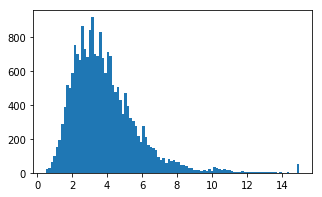

In [11]:
plt.figure(figsize=(5,3))
plt.hist(income,bins=100) #con bins haces los intervalos de la x mas pequeños
plt.show()

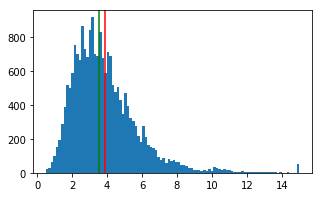

In [12]:
#los colores pueden ser los de html
plt.figure(figsize=(5,3))
plt.hist(income, bins=100)
plt.axvline(x=np.mean(income), color ="red")
plt.axvline(x=np.median(income), color ="green");

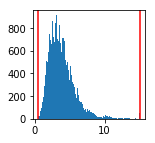

In [13]:
plt.figure(figsize=(2,2))
plt.axvline(x=np.min(income),c="red")
plt.axvline(x=np.max(income),c="red")
plt.hist(income,bins=100)
plt.show()

__Quitamos los outliers__

In [14]:
income_no_outlier=income[income<14]

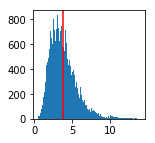

In [15]:
plt.figure(figsize=(2,2))
plt.axvline(x=np.mean(income_no_outlier),c="red")
plt.hist(income_no_outlier,bins=100)
plt.show()

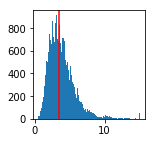

In [16]:
plt.figure(figsize=(2,2))
plt.axvline(x=np.median(income),c="red")
plt.hist(income,bins=100)
plt.show()

In [17]:
from scipy import stats

In [18]:
len(sorted(income))

20640

In [19]:
sorted(income)[10320]

3.5349

__funciones de estadistica descriptiva__

In [20]:
datos = income 
maximo = np.max(datos)
minimo = np.min(datos)
rango = np.ptp(datos)
media = np.mean(datos)
mediana = np.median(datos)
percentil50 = np.percentile(datos,50)
iqr = np.percentile(datos,75) - np.percentile(datos,25)
varianza =np.var(datos)
desvtipica = np.std(datos)
f"""El maximo es {maximo} \n
  El minimo es {minimo} \n
  El rango es {rango} \n
  La media es {media} \n
  La mediana es {mediana} \n
  El percentil 50 es {percentil50} \n
  IQR = {iqr} \n
  La varianza es {varianza} \n
  La desviacion tipica es {desvtipica} \n"""

'El maximo es 15.0001 \n\n  El minimo es 0.4999 \n\n  El rango es 14.5002 \n\n  La media es 3.8706710029069766 \n\n  La mediana es 3.5347999999999997 \n\n  El percentil 50 es 3.5347999999999997 \n\n  IQR = 2.17985 \n\n  La varianza es 3.609147689697444 \n\n  La desviacion tipica es 1.8997756945748738 \n'

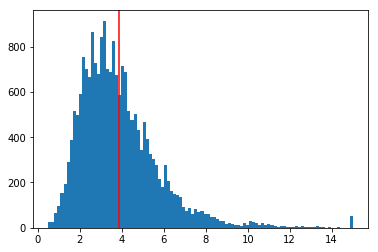

In [21]:
plt.axvline(x=np.mean(income),c="red")
plt.hist(income,bins=100)
plt.show()

In [22]:
income

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [23]:
income-np.mean(income)

array([ 4.454529,  4.430729,  3.386729, ..., -2.170671, -2.003471,
       -1.482071])

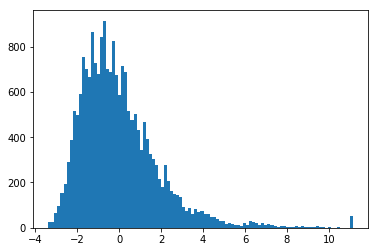

In [24]:
plt.hist(income-np.mean(income),bins=100)
plt.show()

## Outliers

In [25]:
housing_average_age=data["data"][:,1]

In [26]:
housing_average_age

array([41., 21., 52., ..., 17., 18., 16.])

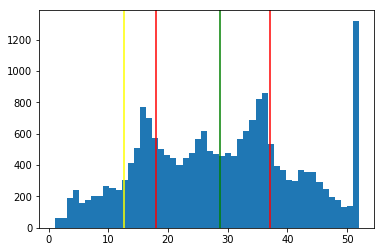

In [27]:
plt.hist(housing_average_age, bins=50)
plt.axvline(x=np.mean(housing_average_age), color ="green")
plt.axvline(x=np.percentile(housing_average_age,25), color ="red")
plt.axvline(x=np.percentile(housing_average_age,75), color ="red")
plt.axvline(x=np.std(housing_average_age), color ="yellow");


In [28]:
haa = housing_average_age

In [29]:
#los ultimos 10 valores
sorted(haa)[-10:]

[52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0]

In [30]:
#quitamos los valores mayores de 52 (limpieza de datos)
haaso=haa[haa<52]

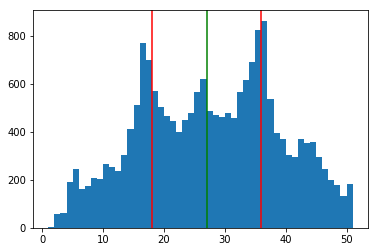

In [31]:
plt.hist(haaso, bins=50)
plt.axvline(x=np.mean(haaso), color ="green")
plt.axvline(x=np.percentile(haaso,25), color ="red")
plt.axvline(x=np.percentile(haaso,75), color ="red");

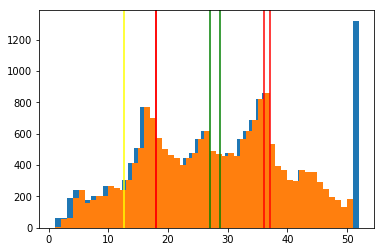

In [32]:
housing_average_age=data["data"][:,1]

housing_average_age

plt.hist(housing_average_age, bins=50)
plt.axvline(x=np.mean(housing_average_age), color ="green")
plt.axvline(x=np.percentile(housing_average_age,25), color ="red")
plt.axvline(x=np.percentile(housing_average_age,75), color ="red")
plt.axvline(x=np.std(housing_average_age), color ="yellow");


haa = housing_average_age

#los ultimos 10 valores
sorted(haa)[-10:]

#quitamos los valores mayores de 52 (limpieza de datos)
haaso=haa[haa<52]

plt.hist(haaso, bins=50)
plt.axvline(x=np.mean(haaso), color ="green")
plt.axvline(x=np.percentile(haaso,25), color ="red")
plt.axvline(x=np.percentile(haaso,75), color ="red");